In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('mobile.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[8.42e+02 0.00e+00 2.20e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [1.02e+03 1.00e+00 5.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 [5.63e+02 1.00e+00 5.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 ...
 [1.91e+03 0.00e+00 9.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 [1.51e+03 0.00e+00 9.00e-01 ... 1.00e+00 1.00e+00 1.00e+00]
 [5.10e+02 1.00e+00 2.00e+00 ... 1.00e+00 1.00e+00 1.00e+00]]


In [ ]:
print(y)

[1 2 2 ... 3 0 3]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, 0:20])
X[:, 0:20] = imputer.transform(X[:, 0:20])

In [ ]:
print(X)

[[8.42e+02 0.00e+00 2.20e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [1.02e+03 1.00e+00 5.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 [5.63e+02 1.00e+00 5.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 ...
 [1.91e+03 0.00e+00 9.00e-01 ... 1.00e+00 1.00e+00 0.00e+00]
 [1.51e+03 0.00e+00 9.00e-01 ... 1.00e+00 1.00e+00 1.00e+00]
 [5.10e+02 1.00e+00 2.00e+00 ... 1.00e+00 1.00e+00 1.00e+00]]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(y.reshape(1, -1))
y = imputer.transform(y.reshape(1, -1))

In [ ]:
print(y)

[[1. 2. 2. ... 3. 0. 3.]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X).toarray()

In [ ]:
print(X)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [ ]:
print(y)

[1 2 2 ... 3 0 3]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
y_test

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[1 0 0 ... 1 0 1]


array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 3, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 2, 2, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['price_range'])
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

accuracy, classification_report_text


(0.8925,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       105\n           1       0.89      0.87      0.88        91\n           2       0.78      0.87      0.82        92\n           3       0.94      0.87      0.90       112\n\n    accuracy                           0.89       400\n   macro avg       0.89      0.89      0.89       400\nweighted avg       0.90      0.89      0.89       400\n')

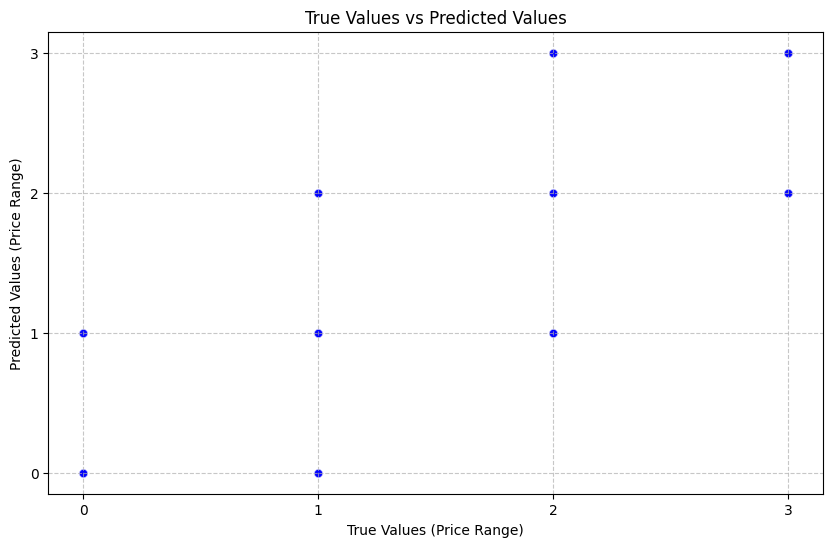

In [ ]:
!pip install seaborn
import seaborn as sns
predicted_vs_actual = pd.DataFrame({
    "True Values": y_test,
    "Predicted Values": y_pred
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_vs_actual, x="True Values", y="Predicted Values", alpha=0.6, color="blue") # Now 'sns' is recognized
plt.title("True Values vs Predicted Values")
plt.xlabel("True Values (Price Range)")
plt.ylabel("Predicted Values (Price Range)")
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()